

**Import the NetworkX package**







In [1]:
import networkx as nx     # nx can be seemed as an alias of networkx module



```
# This is formatted as code
```

1. **Create a graph**

In [ ]:
# Simple example
G = nx.Graph()            # create an empty graph with no nodes and no edges
print(G.nodes(), G.edges())

[] []


2. **Adding a node**

* Adding a node and nodes using add_node.



In [ ]:
G.add_node(11)    # add a single node
print(G.nodes())

[11]


* Adding a list of nodes using add_nodes_from.



In [ ]:
G.add_nodes_from([12,13])    # add a list of nodes
print(G.nodes())
G.clear()
G.add_nodes_from("spam")    # add a list of nodes
print(G.nodes())

[11, 12, 13]
['s', 'p', 'a', 'm']


3. **Adding Edge**
* add an edge

In [ ]:
G.clear()
G.add_nodes_from([1,2,3])
G.add_edge(1,2)
print(G.nodes(), G.edges())

[1, 2, 3] [(1, 2)]


* add a list of edges

In [ ]:
G.add_edges_from([(1,2), (1,3)]) # add edges from a edge list
print(G.edges())
G.add_edges_from([(1,2)]) # adding an edge that is already present
print(G.edges()) # No difference!                                                NetworkX quietly ignores, instead of overwriting the edge if it already exists. 
G.clear()

[(1, 2), (1, 3)]
[(1, 2), (1, 3)]


**Remove edges and nodes**




In [ ]:
#add nodes and edges
G.add_nodes_from([1,2,3])
G.add_edges_from([(1,2)])
G.add_nodes_from("spam")
print('after the 1st operation')
print(G.nodes())
print(G.edges())

#remove edges and nodes

G.remove_node(3)
G.remove_nodes_from("spam")
print('after the 2st operation')
print(G.nodes())
print(G.edges())
print('after the 3st operation')
G.remove_edge(1,2)
print(G.nodes())
print(G.edges())

after the 1st operation
[1, 2, 3, 's', 'p', 'a', 'm']
[(1, 2)]
after the 2st operation
[1, 2]
[(1, 2)]
after the 3st operation
[1, 2]
[]


***Attributes of Graphs, Nodes and Edges***


In [ ]:
#adding attributes to graph
G = nx.Graph(day='Friday')                    # graph has an attribute day which is set to be Friday
print(G.graph, G.nodes(), G.edges())

G.graph['day'] = 'Monday'                     # modify the attribute
print(G.graph)

{'day': 'Friday'} [] []
{'day': 'Monday'}


In [ ]:
#adding attributes to nodes
G=nx.Graph()
G.add_node(1, time = '5pm') # via add_node
G.add_nodes_from([3, 4], time = '2pm') # via add_nodes_from
G.add_node(2) 
G.nodes[2]['time']='10am' # via G.node[]
print(G.nodes(data=True)) # with data=True, attr will be printed

[(1, {'time': '5pm'}), (3, {'time': '2pm'}), (4, {'time': '2pm'}), (2, {'time': '10am'})]


In [ ]:
#adding attributes to edges
G=nx.Graph()
G.add_edge(1, 2, weight=4.7) # via add_edge
G.add_edges_from([(3,4), (4,5)], color='red') # via add_edges_from
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})]) # another example of add_edges_from
print(G.edges(data=True)) # with data=True, attr will be printed

[(1, 2, {'weight': 4.7, 'color': 'blue'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red'}), (4, 5, {'color': 'red'})]


**Accessing Edges and their Neighbors**

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G.edges[1, 2])
print(G.edges[1, 2]['color'])

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
yellow


**Path graph**

* Adding linearly connected nodes.

In [ ]:
H=nx.path_graph(10) # [0..10] linearly connected: 0->1->2....->9
print(H.nodes())
print(H.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


**Directed Graph**

A DiGraph class is the base class for directed graphs.

It includes additional methods specific to directed graphs.

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)]) # 3->1->2
print(DG.in_degree(1), DG.out_degree(1), DG.degree(1))
print(DG.in_degree(1, weight = 'weight'), DG.out_degree(1, weight = 'weight'), DG.degree(1, weight = 'weight')) # degree is the sum
print(list(DG.successors(1)), list(DG.predecessors(1)), list(DG.neighbors(1)))
DG.to_undirected() #to graph


1 1 2
0.75 0.5 1.25
[2] [3] [2]


**Drawing Graph**

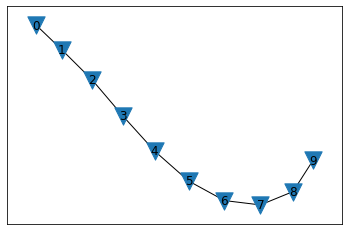

In [ ]:
import matplotlib.pyplot as plt
G = nx.path_graph(10)
plt.figure(figsize=(6,4))
nx.draw_networkx(G, with_labels=True, node_shape='v')
plt.show()

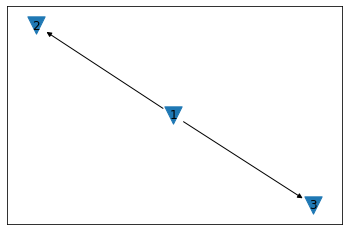

In [ ]:
G = nx.DiGraph([(1,2),(1,3)])
plt.figure(figsize=(6,4))
nx.draw_networkx(G, with_labels=True, node_shape='v')
plt.show()

In [ ]:
# fast examination of all edges using adjacency iterators
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.375)])    # add weighted edges
for n, nbrs in FG.adjacency():  # n: node, nbrs: corresponding neighbors 
    print(nbrs)
    for nbr, edge_attr in nbrs.items():
        data = edge_attr['weight']
        print('(%d, %d, %.3f)' % (n, nbr, data))

{2: {'weight': 0.125}, 3: {'weight': 0.75}}
(1, 2, 0.125)
(1, 3, 0.750)
{1: {'weight': 0.125}, 4: {'weight': 1.2}}
(2, 1, 0.125)
(2, 4, 1.200)
{1: {'weight': 0.75}, 4: {'weight': 0.375}}
(3, 1, 0.750)
(3, 4, 0.375)
{2: {'weight': 1.2}, 3: {'weight': 0.375}}
(4, 2, 1.200)
(4, 3, 0.375)
